In [1]:
import numpy as np

from dagma.linear import DagmaLinear
from dagma.nonlinear import DagmaMLP, DagmaNonlinear

from castle.common import GraphDAG
from castle.metrics import MetricsDAG
from castle.datasets import IIDSimulation, DAG

2024-07-22 13:58:56,738 - c:\Users\q619374\AppData\Local\miniconda3\envs\causal\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


  0%|          | 0/1120000.0 [00:00<?, ?it/s]

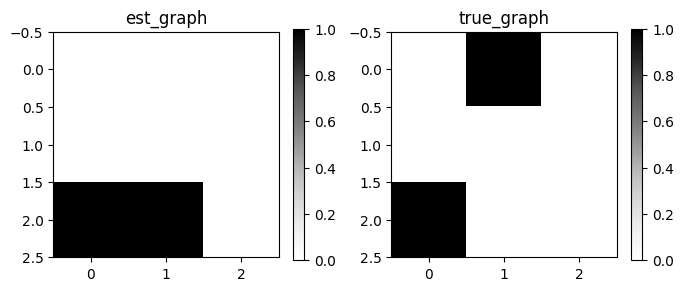

{'fdr': 0.5, 'tpr': 0.5, 'fpr': 1.0, 'shd': 2, 'nnz': 2, 'precision': np.float64(0.5), 'recall': np.float64(0.5), 'F1': np.float64(0.5), 'gscore': np.float64(0.0)}


c:\Users\q619374\AppData\Local\miniconda3\envs\causal\Lib\site-packages\castle\metrics\evaluation.py:193: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  num_tp =  (W_p + W_true).applymap(lambda elem:1 if elem==2 else 0).sum(axis=1).sum()
c:\Users\q619374\AppData\Local\miniconda3\envs\causal\Lib\site-packages\castle\metrics\evaluation.py:195: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  num_fn_r = (W_p - W_true).applymap(lambda elem:1 if elem==1 else 0).sum(axis=1).sum()
c:\Users\q619374\AppData\Local\miniconda3\envs\causal\Lib\site-packages\castle\metrics\evaluation.py:221: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  TP = (W_p + W_true).applymap(lambda elem:1 if elem==2 else 0).sum(axis=1).sum()


In [4]:
dag = DAG.scale_free(n_nodes=3, n_edges=4)
data = IIDSimulation(W=dag, n=100, method='linear', sem_type='logistic')

model = DagmaLinear(loss_type='logistic')
W_est = (model.fit(data.X, max_iter=1e6) > 0.5).astype("int32")
GraphDAG(W_est, data.B)

metrics = MetricsDAG(W_est, data.B)
print(metrics.metrics)